# Building a Euribor Libor Dual Curve and Valuing a Swap

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-interest-rate-swap-price-dual-bootstrapping-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.186 - This build:  01 Dec 2020 at 13:21 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
set_date_format(DateFormatTypes.UK_LONG)

In [4]:
valuation_date = Date(30, 11, 2018)

## Define IR Swap

Define the swap characteristics

In [5]:
start_date = Date(27, 12, 2017)
maturity_date = Date(27, 12, 2067)
notional = 10 * ONE_MILLION
swapType = SwapTypes.RECEIVE

Set up the fixed leg

In [6]:
fixedRate = 0.0150
fixedDCCType = DayCountTypes.THIRTY_360_BOND
fixedFreqType = FrequencyTypes.ANNUAL

Set up the floating leg

In [7]:
float_spread = 0.0
principal = 0.0
floatDCCType = DayCountTypes.ACT_360
floatFreqType = FrequencyTypes.SEMI_ANNUAL

In [8]:
offMarketSwap = IborSwap(start_date, maturity_date, swapType, 
                            fixedRate, fixedFreqType, fixedDCCType,
                            notional,
                            float_spread, floatFreqType, floatDCCType, 
                            CalendarTypes.TARGET)

In [9]:
interp_type = InterpTypes.LINEAR_ZERO_RATES

## Build a USD Libor Single Curve

In [10]:
depos = []; fras = []; swaps = []

spot_days = 0
settlement_date = valuation_date.add_weekdays(spot_days)
depoDCCType = DayCountTypes.ACT_360
depo = IborDeposit(settlement_date, "6M", -0.2510/100.0, depoDCCType); depos.append(depo)
fraDCCType = DayCountTypes.ACT_360

fra = IborFRA(settlement_date.add_tenor("1M"), "6M", -0.2450/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("2M"), "6M", -0.2435/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("3M"), "6M", -0.2400/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("4M"), "6M", -0.2360/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("5M"), "6M", -0.2285/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("6M"), "6M", -0.2230/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("7M"), "6M", -0.2110/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("8M"), "6M", -0.1990/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("9M"), "6M", -0.1850/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("10M"), "6M", -0.1680/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("11M"), "6M", -0.1510/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settlement_date.add_tenor("12M"), "6M", -0.1360/100.0, fraDCCType); fras.append(fra)

swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_360_BOND
fixedFreqType = FrequencyTypes.ANNUAL

swap = IborSwap(settlement_date, "2Y", swapType, -0.1525/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "3Y", swapType, -0.0185/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "4Y", swapType, 0.1315/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "5Y", swapType, 0.2745/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "6Y", swapType, 0.4135/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "7Y", swapType, 0.5439/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "8Y", swapType, 0.6652/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "9Y", swapType, 0.7784/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "10Y", swapType, 0.8799/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "11Y", swapType, 0.9715/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "12Y", swapType, 1.0517/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "15Y", swapType, 1.2369/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "20Y", swapType, 1.3965/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "25Y", swapType, 1.4472/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "30Y", swapType, 1.4585/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "35Y", swapType, 1.4595/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "40Y", swapType, 1.4535/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "45Y", swapType, 1.4410/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "50Y", swapType, 1.4335/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

iborSingleCurve = IborSingleCurve(valuation_date, depos, fras, swaps, interp_type)

In [11]:
iborDepos = depos.copy()
iborFras = fras.copy()
ibor_swaps = swaps.copy()

In [12]:
iborCurve = IborSingleCurve(valuation_date, iborDepos, iborFras, ibor_swaps, interp_type)

In [13]:
ibor_swaps[0].print_fixed_leg_pv()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
COUPON (%): -0.1525
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.THIRTY_360_BOND
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    RATE      PAYMENT       DF          PV        CUM PV
02-DEC-2019  30-NOV-2018  02-DEC-2019   362  1.005556  -0.15250     -1533.47  1.00240918     -1537.17     -1537.17
30-NOV-2020  02-DEC-2019  30-NOV-2020   358  0.994444  -0.15250     -1516.53  1.00305833     -1521.17     -3058.33


In [14]:
ibor_swaps[0]._float_leg.print_valuation()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
SPREAD (BPS): 0.0
FREQUENCY: FrequencyTypes.QUARTERLY
DAY COUNT: DayCountTypes.THIRTY_E_360
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    IBOR      PAYMENT       DF          PV        CUM PV
28-FEB-2019  30-NOV-2018  28-FEB-2019    88  0.244444   -0.25678      -627.69  1.00062809      -628.09      -628.09
29-MAY-2019  28-FEB-2019  29-MAY-2019    91  0.252778   -0.24799      -626.86  1.00125574      -627.65     -1255.74
29-AUG-2019  29-MAY-2019  29-AUG-2019    90  0.250000   -0.23461      -586.51  1.00184334      -587.60     -1843.34
29-NOV-2019  29-AUG-2019  29-NOV-2019    90  0.250000   -0.22069      -551.72  1.00239638      -553.05     -2396.38
02-MAR-2020  29-NOV-2019  02-MAR-2020    93  0.258333   -0.15432      -398.65  1.00279615      -399.77     -2796.15
01-JUN-2020  02-MAR-2020  01-JUN-2020    89  0.247222   -0.11730      -289.98  1.00308703      -290.88     -3087.03
31-AUG-2020  01-JUN-2020  31-AUG-2020    89  0.2472

## Swap Valuation

In [15]:
vBloomberg = 388147

In [16]:
v1 = offMarketSwap.value(valuation_date, iborCurve, iborCurve, -0.268/100.0)

In [17]:
print("Single Curve Value: %9.2f  BBG Value:%9.2f"% (v1, vBloomberg))

Single Curve Value: 381271.36  BBG Value:388147.00


In [18]:
print("Error in bps: %9.6f"% ((v1-vBloomberg)/notional*10000))

Error in bps: -6.875643


In Bloomberg, this swap has a value of 388,147.49 - why the difference - BBG uses a Dual Curve.

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [19]:
depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 0
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "1D", -0.3490/100.0, depoDCCType); depos.append(depo)

fras = []

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.ACT_365F
fixedFreqType = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settlement_date, "2W", swapType, -0.3600/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "1M", swapType, -0.3560/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "2M", swapType, -0.3570/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3M", swapType, -0.3580/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "4M", swapType, -0.3575/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "5M", swapType, -0.3578/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "6M", swapType, -0.3580/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "7M", swapType, -0.3600/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "8M", swapType, -0.3575/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "9M", swapType, -0.3569/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "10M", swapType, -0.3553/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "11M", swapType, -0.3534/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "12M", swapType, -0.3496/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "18M", swapType, -0.3173/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

swap = OIS(settlement_date, "2Y", swapType, -0.2671/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "30M", swapType, -0.2070/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3Y", swapType, -0.1410/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "4Y", swapType, -0.0060/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "5Y", swapType, 0.1285/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "6Y", swapType, 0.2590/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "7Y", swapType, 0.3830/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "8Y", swapType, 0.5020/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "9Y", swapType, 0.6140/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "10Y", swapType, 0.7160/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "11Y", swapType, 0.8070/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "12Y", swapType, 0.8890/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "15Y", swapType, 1.0790/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "20Y", swapType, 1.2460/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "25Y", swapType, 1.3055/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "30Y", swapType, 1.3270/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "35Y", swapType, 1.3315/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "40Y", swapType, 1.3300/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "50Y", swapType, 1.3270/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [20]:
oisCurve = OISCurve(valuation_date, oisDepos, oisFras, oisSwaps, interp_type)

In [21]:
oisCurve._dfs

array([1.        , 1.00002908, 1.0001381 , 1.00030245, 1.00059699,
       1.00088352, 1.00115709, 1.00147258, 1.00175876, 1.00207553,
       1.00236606, 1.0026569 , 1.00296799, 1.00322485, 1.00348897,
       1.00475563, 1.00537308, 1.00518321, 1.00425241, 1.00024097,
       0.99356254, 0.9844542 , 0.97329392, 0.96018927, 0.94550181,
       0.92977295, 0.9134757 , 0.89666882, 0.84664609, 0.77285729,
       0.71384822, 0.66373016, 0.6201139 , 0.58084365, 0.50997795])

## Building the Dual Curve

In [22]:
iborSingleCurve = IborSingleCurve(valuation_date, iborDepos, iborFras, ibor_swaps, interp_type)

In [23]:
iborDualCurve = IborDualCurve(valuation_date, oisCurve, iborDepos, iborFras, ibor_swaps, interp_type)

In [24]:
v2 = offMarketSwap.value(valuation_date, oisCurve, iborDualCurve, -0.268/100.0)

In [25]:
print("Two Curve Value: %9.2f  BBG Value:%9.2f"% (v2, vBloomberg))

Two Curve Value: 387290.77  BBG Value:388147.00


In [26]:
print("Error in bps: %9.6f"% ((v2-vBloomberg)/notional*10000))

Error in bps: -0.856230


In [27]:
offMarketSwap.swap_rate(valuation_date, iborDualCurve )*100

1.3956719290048496

## Single vs Dual Curve

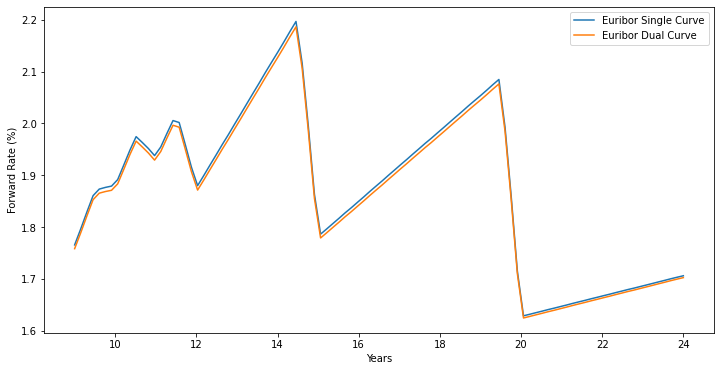

In [28]:
years = np.linspace(9, 24, 100)
dates = valuation_date.add_years(years)

iborSingleCurveFwds = iborSingleCurve.fwd_rate(dates, "6M")    
iborDualCurveFwds = iborDualCurve.fwd_rate(dates, "6M")

plt.figure(figsize=(12,6))
plt.plot(years, iborSingleCurveFwds*100.0, label="Euribor Single Curve")
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

I calculate the difference between the two curves.

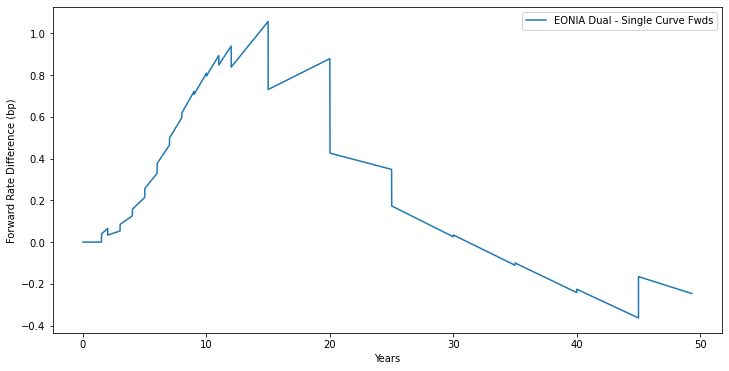

In [29]:
dayMax = 50*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuation_date.add_years(years)

liborSingleCurveFwds = iborSingleCurve.fwd(dates)    
liborDualCurveFwds = iborDualCurve.fwd(dates)

diff = liborSingleCurveFwds - liborDualCurveFwds

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="EONIA Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

Copyright (c) Dominic O'Kane 2020